In [38]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import json 
from datetime import datetime

In [67]:
#methods: 

#getting messages timestamp_ms as dates:
def get_dates(data,msg_from):
    dates = []
    #looping through the messages array.
    #getting timestamps_ms out and converting then to a readable string.
    #appending them to the dates array. 
    for el in data['messages']:
        if el['sender_name'] == msg_from and el['timestamp_ms']!=None:
            msint = int(el['timestamp_ms'])
            conv_date = datetime.fromtimestamp(msint/1000.0).strftime('%Y-%m-%d')
            dates.append(conv_date)    
    dates.sort()
    return dates

#getting number of messages per day, by counting number of equal dates
def number_of_msgs_npasarray(array):
    number_msgs_per_day = []
    counter = 1
    for i in range(len(array)-2):
        if array[i] != array[i+1]:
            number_msgs_per_day.append(counter)
            counter = 1
        if array[i] == array[i+1]:
            counter += 1
    vector = np.array(number_msgs_per_day)
    return vector
    

In [68]:
with open('../data/message_1.json') as json_file:
    data = json.load(json_file)


dates_x = get_dates(data,'x')

dates_nima = get_dates(data,'Nima Abdollahi')


In [69]:
#vectors for x:
yVector_x = number_of_msgs_npasarray(dates_x)
x_1 = np.array(range(0,len(yVector_x)))

#vectores for nima:
yVector_nima = number_of_msgs_npasarray(dates_nima)
x_2 = np.array(range(0,len(yVector_nima)))



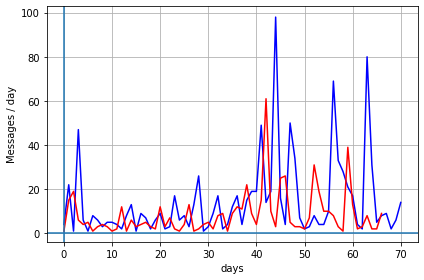

In [70]:
#ploting:
figure = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(1,1)

axis = figure.add_subplot(gs[:])
axis.set_ylabel('Messages / day')
axis.set_xlabel('days')
#plt.legend(['red -> nima'])
#plt.legend(['blue -> x'])
plt.plot(x_1,yVector_x,'b') # person x
plt.plot(x_2,yVector_nima,'r') # person nima
plt.grid()
plt.axhline()
plt.axvline()
plt.show()